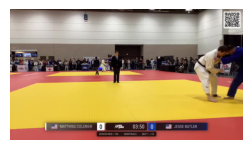

In [1]:
from imageio.v3 import imread
import matplotlib.pyplot as plt

root = "/cs-share/pradalier/tmp/judo"
img_path = f"{root}/frames/mat_01/0005/0000.jpg"

img = imread(img_path)
plt.figure(figsize=(3, 4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [2]:
from ultralytics import YOLO

checkpoint = f"{root}/models/entity_detection/v2/weights/best.pt"
model = YOLO(checkpoint)
results = model(img_path)


image 1/1 /cs-share/pradalier/tmp/judo/frames/mat_01/0005/0000.jpg: 384x640 1 player_blue, 1 player_white, 1 referee, 400.3ms
Speed: 27.2ms preprocess, 400.3ms inference, 1069.4ms postprocess per image at shape (1, 3, 384, 640)


In [3]:
# let's try to get the embedding layers out of yolo
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0-1): 2 x Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Co

In [4]:
model.model.model[-1]._modules["dfl"]._modules["conv"]
model.model.model[-1]._modules["cv3"]._modules["2"]

Sequential(
  (0): Conv(
    (conv): Conv2d(576, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (act): SiLU(inplace=True)
  )
  (2): Conv2d(192, 3, kernel_size=(1, 1), stride=(1, 1))
)

In [5]:
# let's get the output from the second to last layer
activations = []


def hook(model, input, output):
    activations.append(output.detach().cpu().numpy())


(model.model.model[-1]._modules["cv3"]._modules["2"].register_forward_hook(hook))

In [6]:
model.predict(img)


0: 384x640 1 player_blue, 1 referee, 137.6ms
Speed: 1.4ms preprocess, 137.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'player_blue', 1: 'player_white', 2: 'referee'}
 obb: None
 orig_img: array([[[ 84,  64,  53],
         [ 84,  64,  53],
         [ 84,  64,  53],
         ...,
         [151, 140, 138],
         [151, 140, 138],
         [151, 140, 138]],
 
        [[108,  88,  77],
         [108,  88,  77],
         [108,  88,  77],
         ...,
         [151, 140, 138],
         [151, 140, 138],
         [151, 140, 138]],
 
        [[106,  86,  75],
         [106,  86,  75],
         [106,  86,  75],
         ...,
         [152, 141, 139],
         [152, 141, 139],
         [152, 141, 139]],
 
        ...,
 
        [[201,  89,  87],
         [201,  89,  87],
         [201,  89,  87],
         ...,
         [188,  66,  63],
         [188,  66,  63],
         [188,  66,  63]],
 
        [[201,  89,  87],
         [201,  89,  87],
         [201,  89, 

In [7]:
len(activations), activations[0].shape

(1, (1, 3, 12, 20))

In [8]:
3 * 12 * 20, 192 * 12 * 20

(720, 46080)

(3, 12, 20)


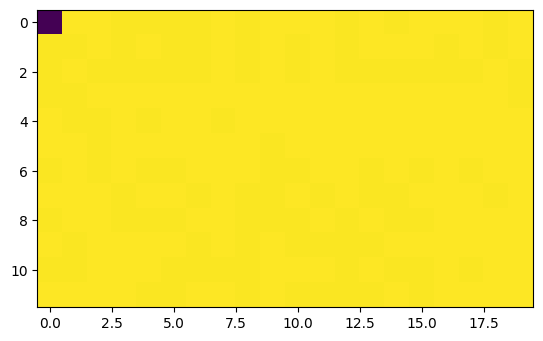

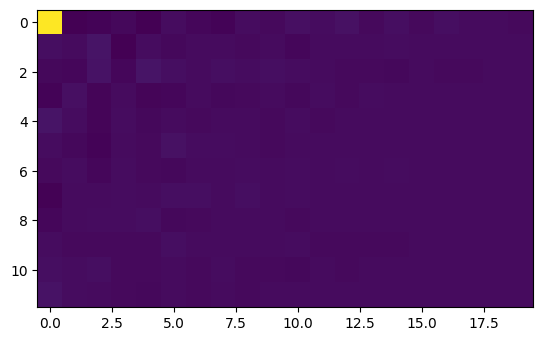

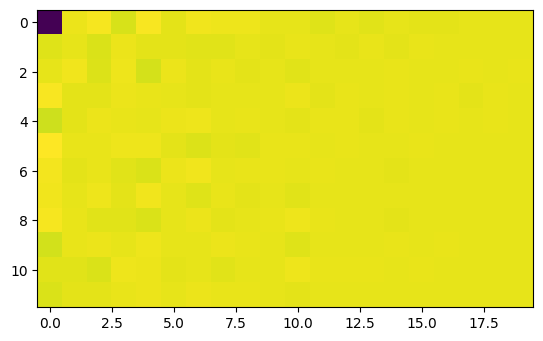

In [9]:
from scipy.fftpack import dctn

res = dctn(activations[0][0])
print(res.shape)
# convert it to 2d
for i in range(3):
    plt.imshow(res[i])
    plt.show()

In [10]:
model = YOLO("yolov8n.pt")
model.model

100%|██████████| 6.23M/6.23M [00:00<00:00, 41.2MB/s]


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    